# Data Science Lab: Lab 3

Submit:
1. A pdf of your notebook with solutions. Make sure that the solutions are present and visible in the pdf.
2. A link to your colab notebook or also upload your .ipynb if not working on colab.

# Goals of this Lab

1. More experience with regression and ridge regression (regularization)
2. Start playing with Kaggle
3. More experience with Lasso.
4. An initial shot at ensembling and stacking.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline


C:\Users\tonys\AppData\Local\Temp\ipykernel_26620\146195214.py:8: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


## Problem 1 (Optional)

**Part 1** Make sure you can run through and understand the Jupyter notebook on Ridge
Regression and Colinearity we saw in class: https://colab.research.google.com/drive/1R7xTNHxAwhL1tANiGT2KRO-OT0D8KV2Z

**Part 2.** What is the test error of the “zero-variance” solution, namely, the all-zeros solution?

**Part 3.** The least-squares solution does not seem to do too well, because it has so much variance. Still, it is unbiased. Show this empirically: generate many copies of the data, and for each one, obtain the least-squares solution. Average these, to show that while each run produces a beta hat that is very different, their average begins to look more and more like the true beta.

**Part 4.** Alternatively, if one had access to lots of data, instead of computing the least-square solution over smaller batches and then averaging these solutions as in the previous part of the problem, an approach is to run a single least-squares regression over all the data. Which approach do you think is better? Can you support your conclusion with experiments?


*Part2*

If we make Lambda very big which, indicate zero-variance solution, it converges to 44.017161785033366
> 44.017161785033366

Text(0.5, 1.0, 'Each color represent one train set')

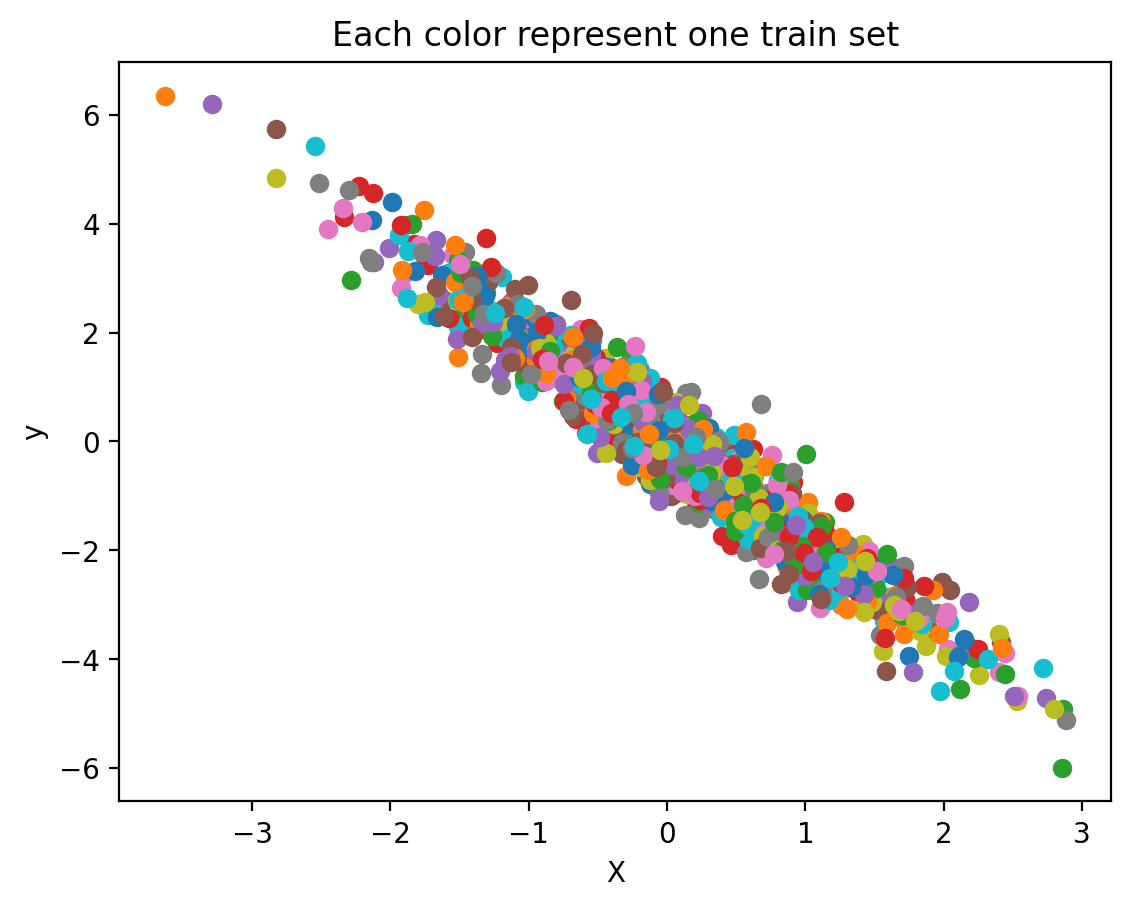

In [252]:
#Part 3

# First we generate some data
# We generate n data points
n = 10

emperical_count=100 #how many time we will mean the beta values emperically
X_train=[]
y_train=[]

for i in range(emperical_count):
    

    X = np.random.standard_normal(10)

    # The true y is generated as a linear function of X
    beta = -1.8
    y = np.dot(X,beta) + rng.standard_normal(n)*0.5

    # We can plot the data to see what it looks like
    plt.scatter(X,y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.plot()
    
    X_train.append(X)
    y_train.append(y)
    
X_train=np.array(X_train)
y_train=np.array(y_train)

# print(X_train,"\n\n\n",y_train)
plt.title("Each color represent one train set")



In [253]:
from sklearn.linear_model import LinearRegression

# Let's fit a degree 6 polynomial -> make multiple beta's
beta_list=[]
for k in range(emperical_count):

    # The solution is
    
#     beta_aug_hat = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y)
    model = LinearRegression().fit(X_train[k].reshape(-1,1), y_train[k])

    beta_aug_hat = model.coef_[0]
    
    print(beta_aug_hat)
    beta_list.append(beta_aug_hat)


-2.001717807403308
-2.1039434369030534
-1.7532514774585228
-1.6485038915737935
-1.75635288245908
-1.7161051278097068
-1.7987368853681343
-1.7364730869988143
-2.2171204058078597
-1.8093497787352735
-1.584057250244623
-1.8323694137439404
-1.9353426407713064
-2.0470453433804017
-2.0695236183713432
-1.7725737635156835
-1.8327378520440207
-1.7903635764708266
-1.8845869426805437
-1.8072219069310933
-2.03521312390325
-1.8595505063827868
-1.8735980164327382
-1.8770355413020567
-1.7669890804480937
-1.9844327088453704
-1.7458527510504929
-1.7931720251349204
-1.825027884119626
-1.606837969595631
-1.8135641222284564
-1.6689879663298655
-1.6956499065951174
-1.4721861712857525
-1.7065486583546152
-1.7345268606181046
-1.9149721941080793
-1.631890512886261
-1.9942482344377492
-1.9797641288726002
-1.8287834227814583
-1.7865016367017341
-1.890247809757748
-1.6369087170883472
-1.799230222420347
-2.0090218637249726
-1.8037176994766608
-1.9484569588534075
-1.7271419453055532
-2.0425690329503716
-1.81050320

In [267]:
#Now lets emperically, mean the beta values
beta_list=np.array(beta_list)
print(beta_list,beta_list.shape)

total_beta_mean=[]


total_beta_mean=np.mean(beta_list)
    
total_beta_mean=np.array(total_beta_mean)

print(total_beta_mean)

[-2.00171781 -2.10394344 -1.75325148 -1.64850389 -1.75635288 -1.71610513
 -1.79873689 -1.73647309 -2.21712041 -1.80934978 -1.58405725 -1.83236941
 -1.93534264 -2.04704534 -2.06952362 -1.77257376 -1.83273785 -1.79036358
 -1.88458694 -1.80722191 -2.03521312 -1.85955051 -1.87359802 -1.87703554
 -1.76698908 -1.98443271 -1.74585275 -1.79317203 -1.82502788 -1.60683797
 -1.81356412 -1.66898797 -1.69564991 -1.47218617 -1.70654866 -1.73452686
 -1.91497219 -1.63189051 -1.99424823 -1.97976413 -1.82878342 -1.78650164
 -1.89024781 -1.63690872 -1.79923022 -2.00902186 -1.8037177  -1.94845696
 -1.72714195 -2.04256903 -1.8105032  -1.69468171 -1.88002872 -1.72871581
 -1.7562414  -2.24955398 -1.6937368  -1.76201274 -1.60099902 -1.6935851
 -1.79533368 -1.73720263 -1.84501119 -1.85165714 -2.02916337 -1.47122946
 -1.71965118 -1.73841878 -1.68320613 -1.64125417 -1.86257799 -1.70046252
 -1.61083743 -1.5113004  -1.69563265 -1.47678965 -1.86455722 -1.79322972
 -2.04519986 -1.88228127 -1.93499657 -1.67820466 -1.

Text(0.5, 1.0, '-1.8 = True value is the top count of Beta_hat')

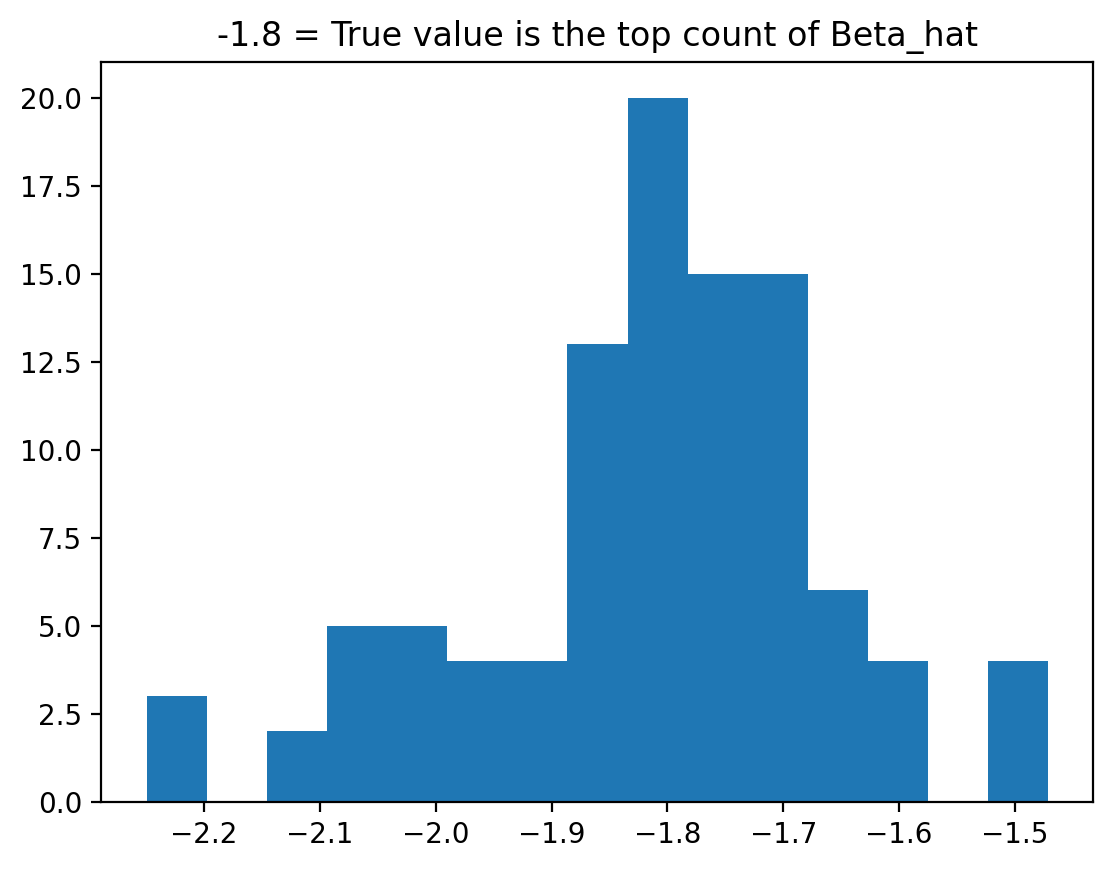

In [255]:
plt.hist(beta_list,bins=15)
plt.title("-1.8 = True value is the top count of Beta_hat")

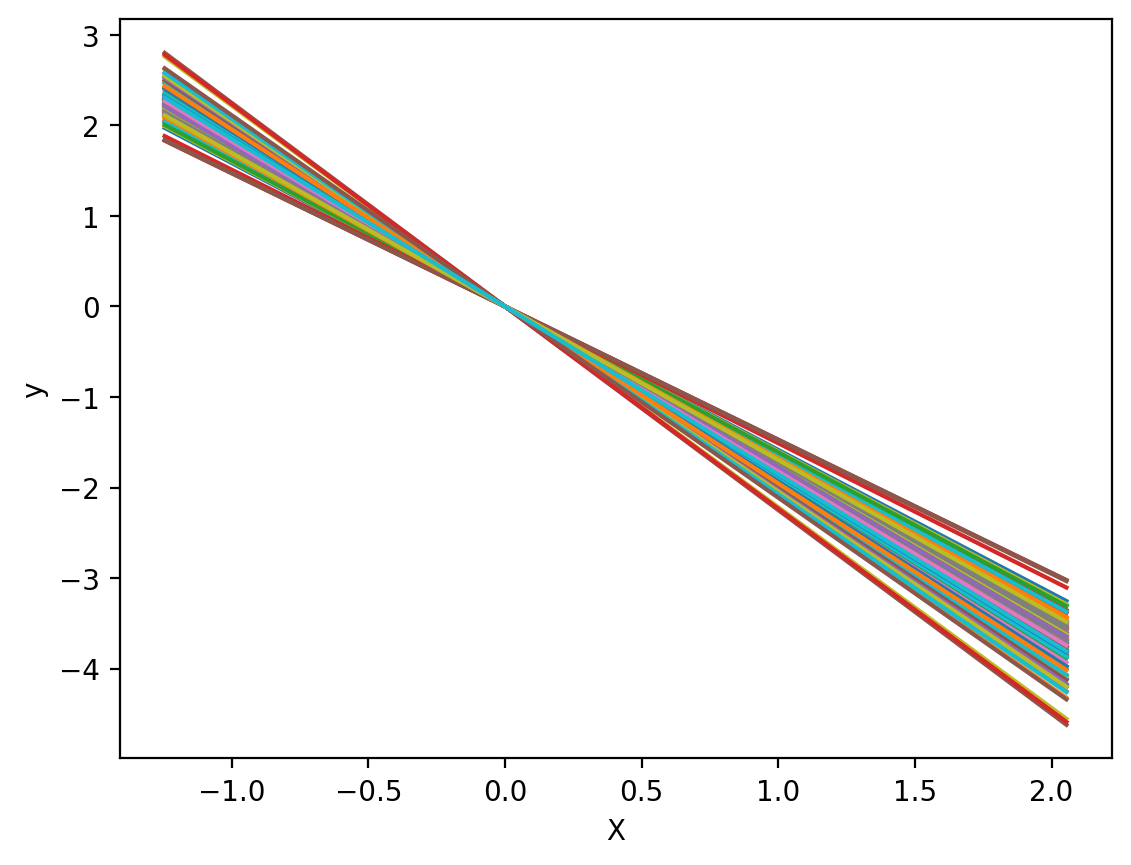

In [256]:
# Now let's plot the fit
x_min = np.min(X)
x_max = np.max(X)
x_vals = np.arange(x_min,x_max,0.05)
N = x_vals.shape[0]

y_test_list=[]
for k in range(emperical_count):
    

    
    y_test_hat = x_vals*beta_list[k]
    
    plt.plot(x_vals,y_test_hat)
#     plt.scatter(X_train[0],y_train[0], c = np.ones(n))
    plt.xlabel('X')
    plt.ylabel('y')
    plt.plot()
       
    y_test_list.append(y_test_hat)

Text(0.5, 1.0, 'True graph vs Emperical Beta mean graph ~ Almost Identical')

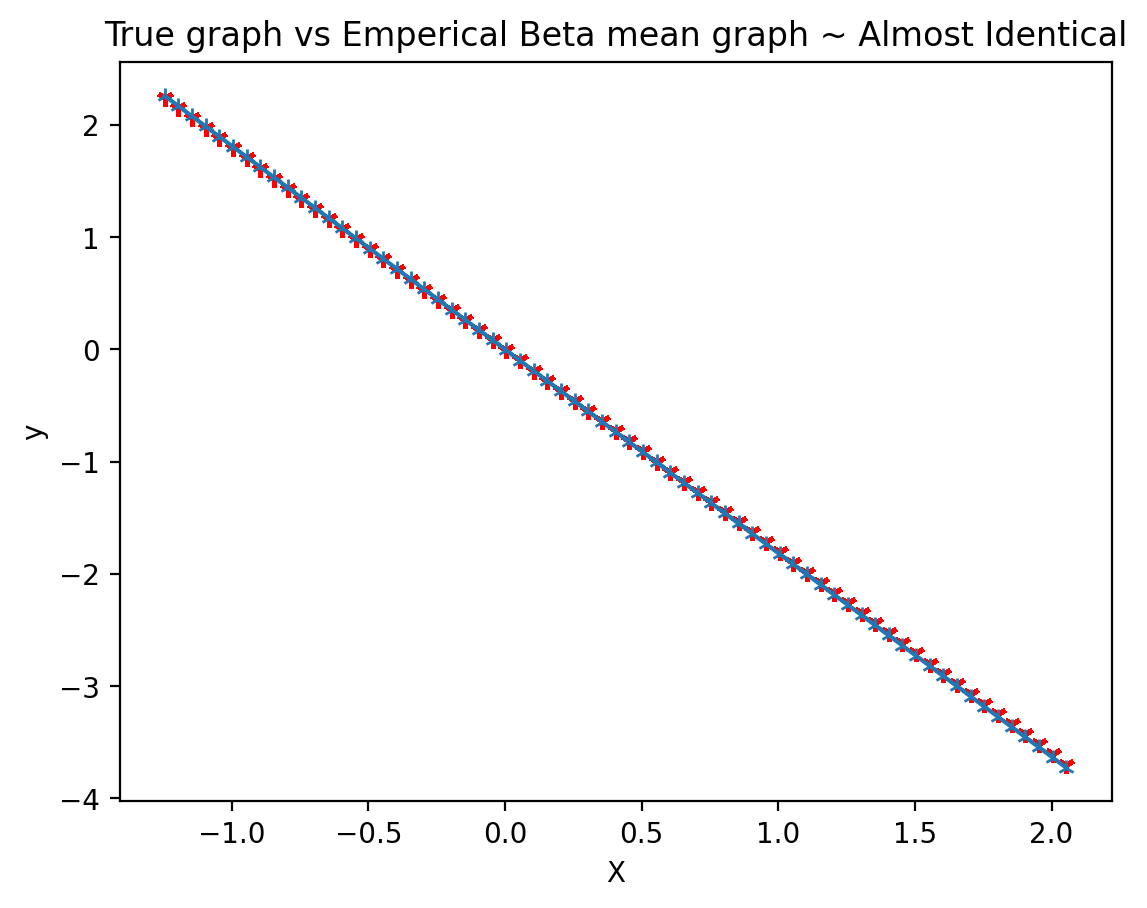

In [257]:
# We can plot against some testing data
y_true = x_vals*beta

for i in range(emperical_count):
    
#     plt.plot(x_vals,y_test_list[i])
#     plt.scatter(X,y, c = np.ones(n))
    plt.scatter(x_vals,y_true, marker="1",color='r')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.plot()

#emperical total beta mean:

y_emp=x_vals*total_beta_mean

plt.plot(x_vals,y_emp,marker='2')
plt.title("True graph vs Emperical Beta mean graph ~ Almost Identical")

[-1.80927491]


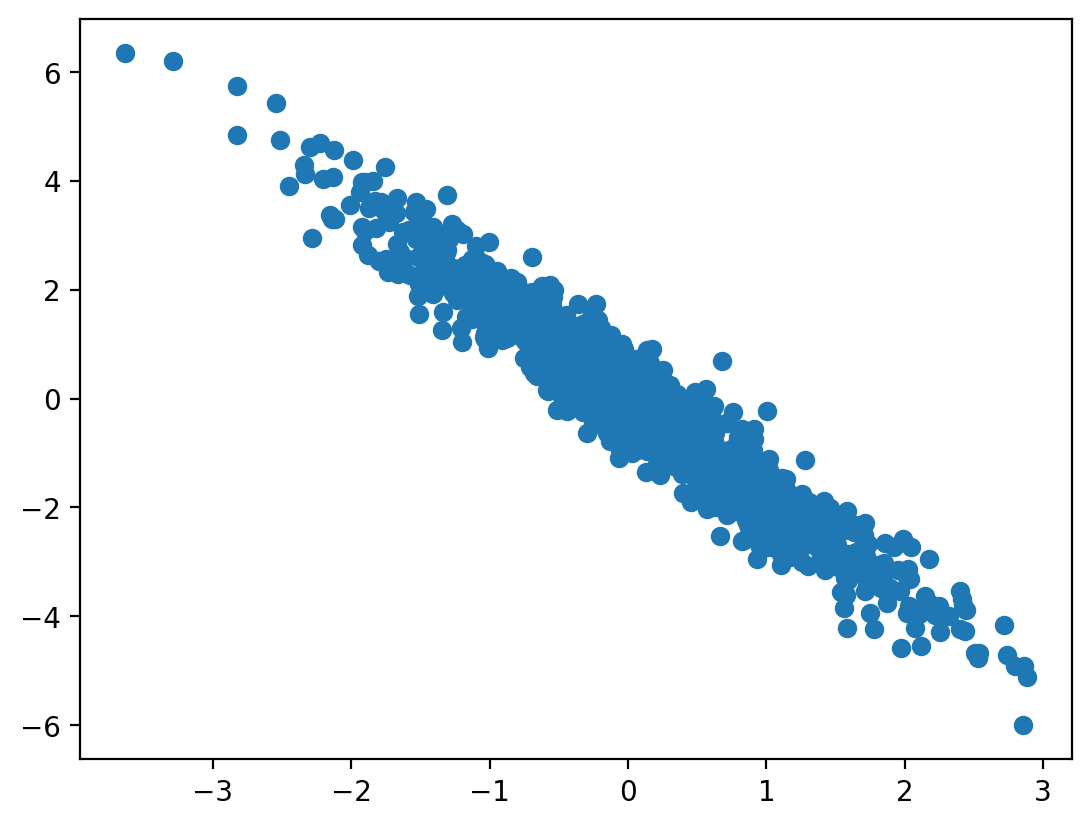

In [266]:
#part 4

#make a single batch overall all data X_train
X_total=X_train.reshape(-1,1)
y_total = y_train.reshape(-1,1)

plt.scatter(X_total,y_total)

model = LinearRegression().fit(X_total, y_total)

beta_total_hat = model.coef_[0]

print(beta_total_hat)

*Part 4*

Empercial beta (100 batch value): [-1.814243057238183]
    
One Single Total Data beta(1 batch = all set): [-1.80927491]
    
Since training with All data is minimalizing overall dataset error globally, Second is better.
There fore, training with total single dataset is more close with true value -1.8. However, but multiple batch training regressions, it can be more computationally efficient for very large datasets, especially when used in a distributed system where memory limitations prevent loading all the data at once such as RAM limit.



### Problem 2: Starting in Kaggle.
Later this semester, we are opening a Kaggle competition made for this class. In that one, you will be participating on your own. This is an intro to get us started, and also an excuse to work with regularization and regression which we have been discussing.

**Part 1.** Let’s start with our first Kaggle submission in a playground regression competition. Make an account to Kaggle and find https://www.kaggle.com/c/house-prices-advanced-regression-techniques/

https://www.kaggle.com/code/apapiu/regularized-linear-models


**Part 2.** Follow the data preprocessing steps from https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models. Then run a ridge regression using $\lambda = 0.1$. Make a submission of this prediction, what is the RMSE you get? (Hint: remember to exponentiate np.expm1(ypred) your predictions).

**Part 3.** Compare a ridge regression and a lasso regression model. Optimize the alphas using cross validation. What is the best score you can get from a single ridge regression model and from a single lasso model?

**Part 4.** The $\ell_0$ (or $L_0$) norm is the number of nonzeros of a vector. Plot the $L_0$ norm of the coefficients that lasso produces as you vary the strength of regularization parameter $\lambda$.

**Part 5.** Add the outputs of your models as features and train a ridge regression on all the features plus the model outputs (This is called Ensembling and Stacking). Be careful not to overfit. What score can you get? (We will be discussing ensembling more, later in the class, but you can start playing with it now).

*Part 2*
if Lambda = 0.1 we got 0.13777537660259923 of cross validation RMSE value

Submission of ridge prediction: [121519.48222426 159637.90171124 187900.72792424 ... 176763.91155721
 121610.55742924 219174.15029548]
 
 
 *Part 3*
 
 Best Alpha for Lasso Regression : alpha ~ 0.0005
 Lasso RMSE score :  0.12256735885048131
 
 Best Alpha for Ridge Regression : alpha ~ 10
 Ridge RMSE score:  0.12733734668670768
 
 *Part 4*
 
>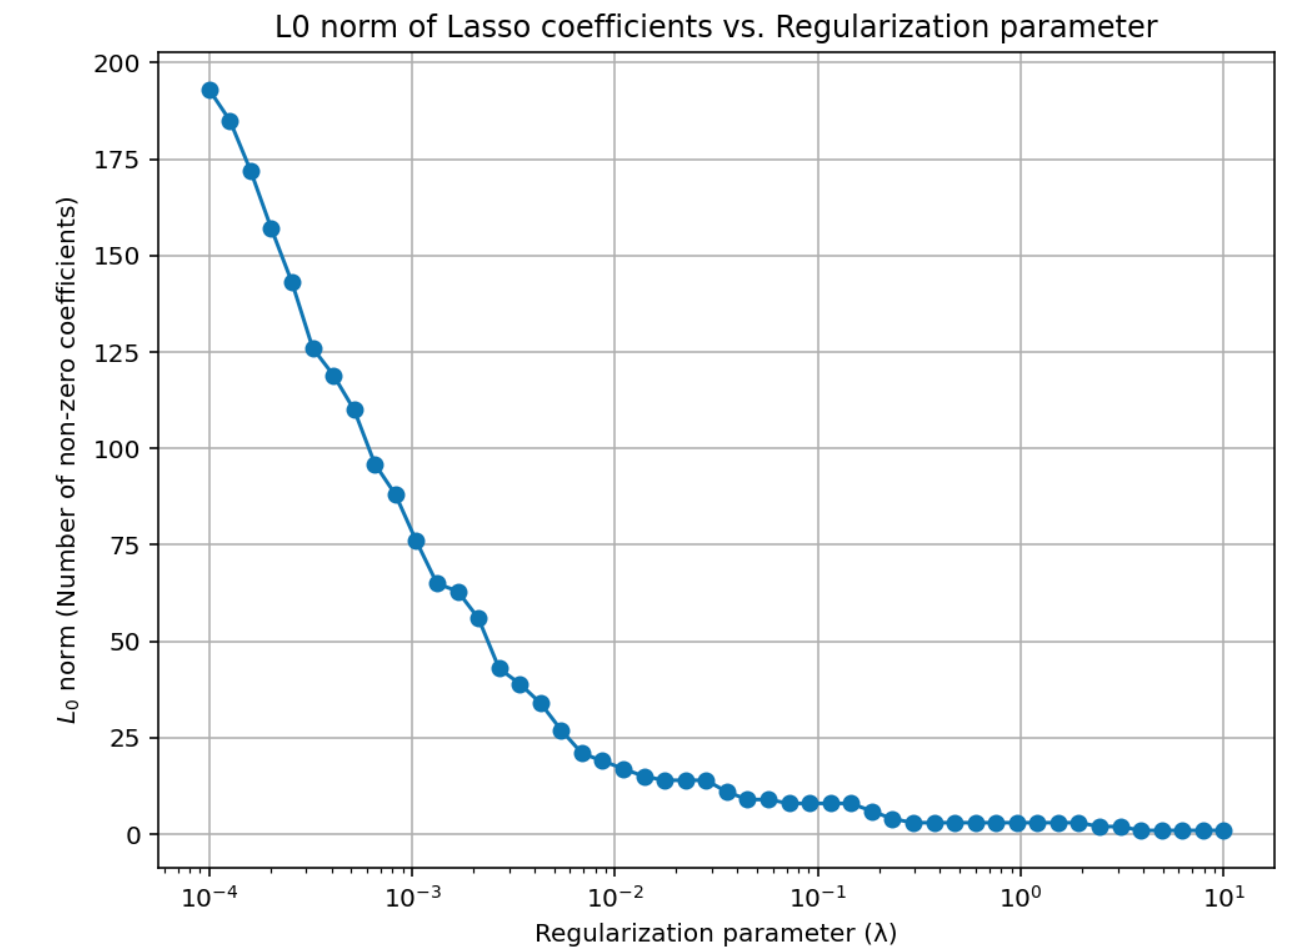

*Part 5*

before:  0.12733734668670768

after:  0.12449


## Problem 3 (Nothing to turn in)

Run this simple example from scikit learn, and understand what each command is doing: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

## Problem 4

Use the data generation used in the LASSO notebook where we first introduced Lasso, to generate data.

You can find that again here: https://colab.research.google.com/drive/1_NGlKLpXpcobUIlan5DY5nA-5aT39Hxc

**Part 1.** Manually implement forward selection. Report the order in which you add features.

**Part 2.** In this example, we know the true support size is 5. But what if we did not know this? Plot test error as a function of the size of the support. Use this to recover the true support size. Justify your answer.

**Part 3.** Use Lasso with a manually implemented Cross validation using the metric of your choice.
What is the value of the hyperparameter? (Manually implemented means that you can either
do it entirely on your own, or you can use GridSearchCV, but I’m asking you not to use
LassoCV, which you will use in the next problem).

**Part 4.** (Optional) Change the number of folds in your CV and repeat the previous step. How does the optimal
value of the hyperparameter change? Try to explain any trends that you find.

**Part 5.** (Optional) Read about and use LassoCV from sklearn.linear model. How does this compare with what
you did in the previous step? If they agree, then explain why they agree, and if they disagree
explain why. This will require you to make sure you understand what LassoCV is doing.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(7)

n_samples, n_features = 100, 200
X = np.random.randn(n_samples, n_features)

k = 5
# beta generated with k nonzeros
#coef = 10 * np.random.randn(n_features)
coef = 10 * np.ones(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[k:]] = 0  # sparsify coef
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal((n_samples,))

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:25], y[:25]
X_test, y_test = X[25:], y[25:]


[[ 1.6905257  -0.46593737  0.03282016 ...  0.63641286  0.93885177
   0.14706586]
 [-1.68339684  1.01501494 -1.44154372 ...  0.48982214  1.54248315
   1.07954585]
 [-0.06000144  0.78768534 -1.43170411 ...  0.33793021  1.90430637
  -0.28010706]
 ...
 [ 1.29625993 -1.51441174 -0.15819643 ...  0.42122391  0.36412705
  -0.78620193]
 [-1.69440898 -0.63481014  1.35469733 ... -2.40799847  0.7385255
  -0.18059802]
 [ 2.54945173  0.11121719 -2.35193575 ...  0.43859141  0.88463216
  -0.82270047]]


C:\Users\tonys\anaconda3\envs\ECE460J_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+00, tolerance: 1.128e+00
  model = cd_fast.enet_coordinate_descent(


R^2 on test data : 0.764114


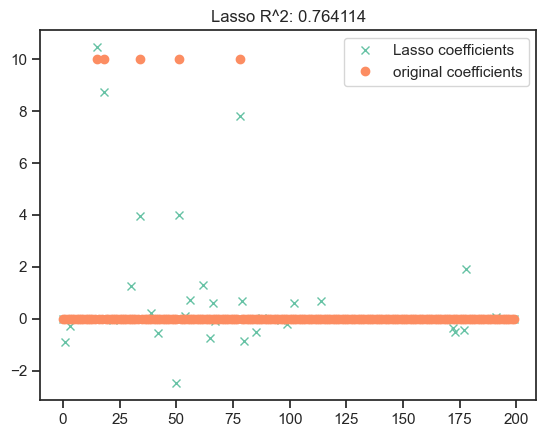

In [5]:
# Lasso
# Import the basics
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
sns.set(style='ticks', palette='Set2')
%matplotlib inline
from sklearn.linear_model import Lasso

lamda = 0.01 # for now, an arbitrary choice
lasso = Lasso(alpha=lamda)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
#print(lasso)
print("R^2 on test data : %f" % r2_score_lasso)

# We plot the results
plt.plot(lasso.coef_, 'x',label='Lasso coefficients')
plt.plot(coef, 'o', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f"
          % (r2_score_lasso))
plt.show()



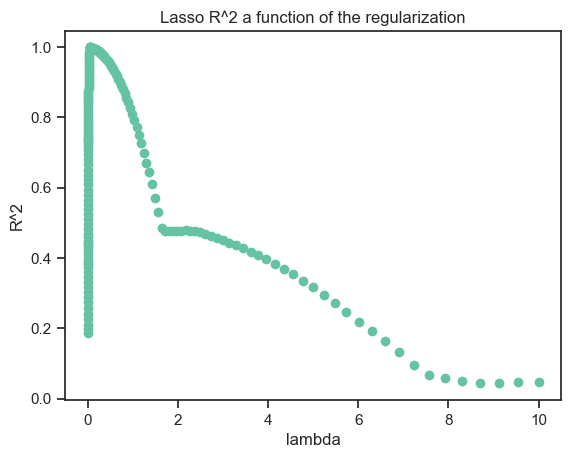

The largest value of R^2 is: 0.9993425041758524
This occurs at lambda =  0.053535666774107246


In [9]:
n_lamdas = 200
lamdas = np.logspace(-3, 1, n_lamdas)
# plt.plot(lamdas)
# print(lamdas)

import warnings
warnings.filterwarnings("ignore")
r_sq = np.ones(lamdas.shape[0])
for i in range(lamdas.shape[0]):
  lamda = lamdas[i]
  lasso.set_params(alpha = lamda)
  lasso.fit(X_train, y_train)
  y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
  r2_score_lasso = r2_score(y_test, y_pred_lasso)
  r_sq[i] = r2_score_lasso
    
# Now let's plot the R^2 values
plt.scatter(lamdas,r_sq)
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Lasso R^2 a function of the regularization')
#plt.axis('tight')
plt.show()

print('The largest value of R^2 is:', max(r_sq))
index_max = np.argmax(r_sq)
print('This occurs at lambda = ', lamdas[index_max])

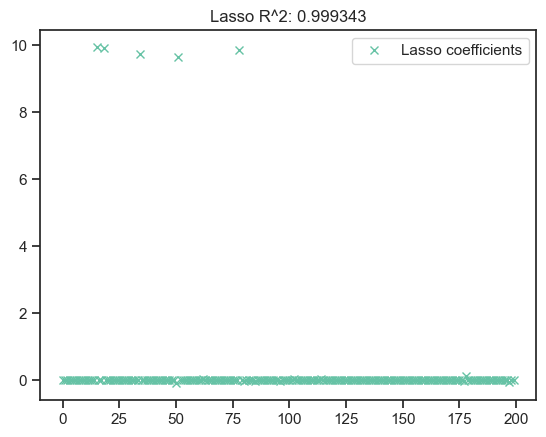

In [10]:
# Now let's try this value, and see the beta we recover
lamda = lamdas[index_max]
lasso = Lasso(alpha=lamda)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
#print(lasso)
plt.plot(lasso.coef_,'x', label='Lasso coefficients')
#plt.plot(coef, 'o', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f"
          % (r2_score_lasso))
plt.show()

In [19]:
#part 1
X_train_pd=pd.DataFrame(X_train)
coef = pd.Series(lasso.coef_, index = X_train_pd.columns)
print("Lasso picked " + str(sum(   coef >= 6)) + " variables and eliminated the other " +  str(sum(coef < 6)) + " variables")

Lasso picked 5 variables and eliminated the other 195 variables


index order:  15, 18, 78, 34, 51


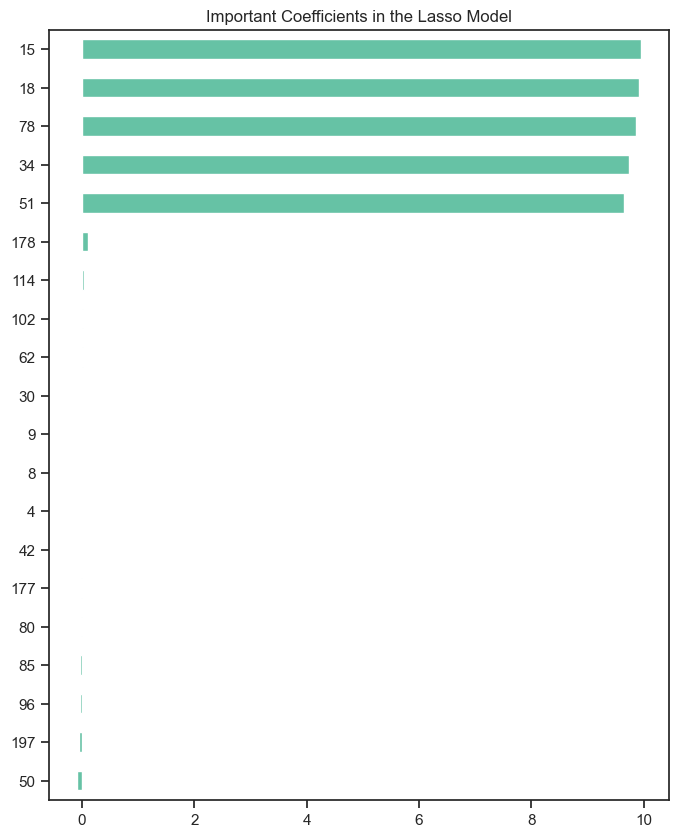

In [23]:
imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Important Coefficients in the Lasso Model")
print("index order: ","15, 18, 78, 34, 51")

In [36]:
#Part 2 In this example, we know the true support size is 5. 
#But what if we did not know this? Plot test error as a function of the size of the support. 
#Use this to recover the true support size. Justify your answer.
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso
from sklearn.model_selection import cross_val_score

def rmse_cv(model,X_test,y_pred):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)


In [44]:
lambdas = np.logspace(-3, 1, n_lamdas)
epsilon=0.5

lasso_picked = []
test_error_lasso_list=[]

for i in lambdas:
    lasso = Lasso(alpha=i)
    y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
    test_error_lasso=rmse_cv(lasso,X_test, y_pred_lasso)
    test_error_lasso_list.append(test_error_lasso.mean())
    
    
    coef=lasso.coef_
    lasso_picked_feature=sum(coef >= 6)
#     print(lasso_picked_feature)
    lasso_picked.append(lasso_picked_feature)
    


I have used RMSE test error to justify the number of Lasso feature selection, as you can see, 5 features have the lowest test error, so important true features are 5.


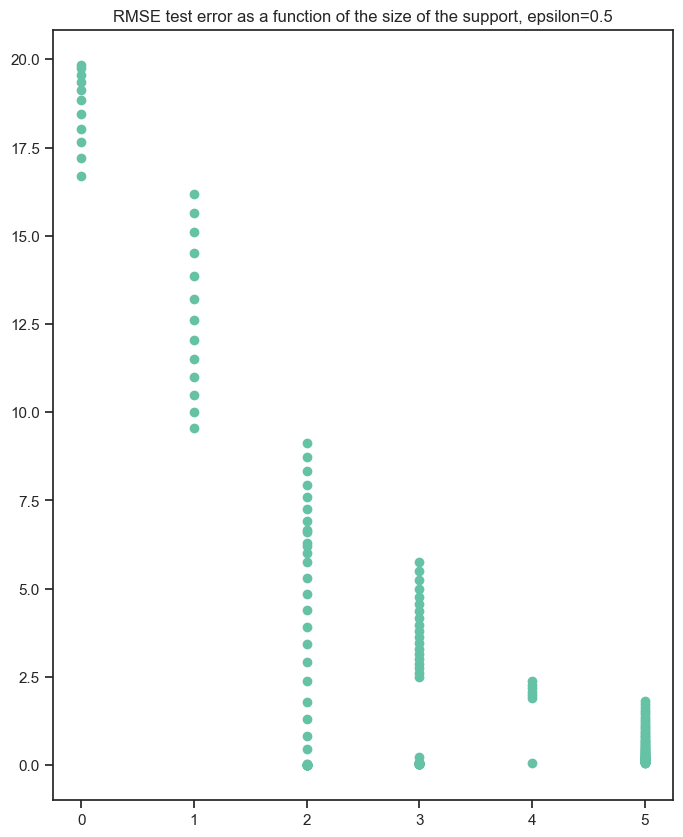

In [46]:
plt.scatter(lasso_picked,test_error_lasso_list)

plt.title("RMSE test error as a function of the size of the support, epsilon=0.5")

print("I have used RMSE test error to justify the number of Lasso feature selection, as you can see, 5 features have the lowest test error, so important true features are 5.")

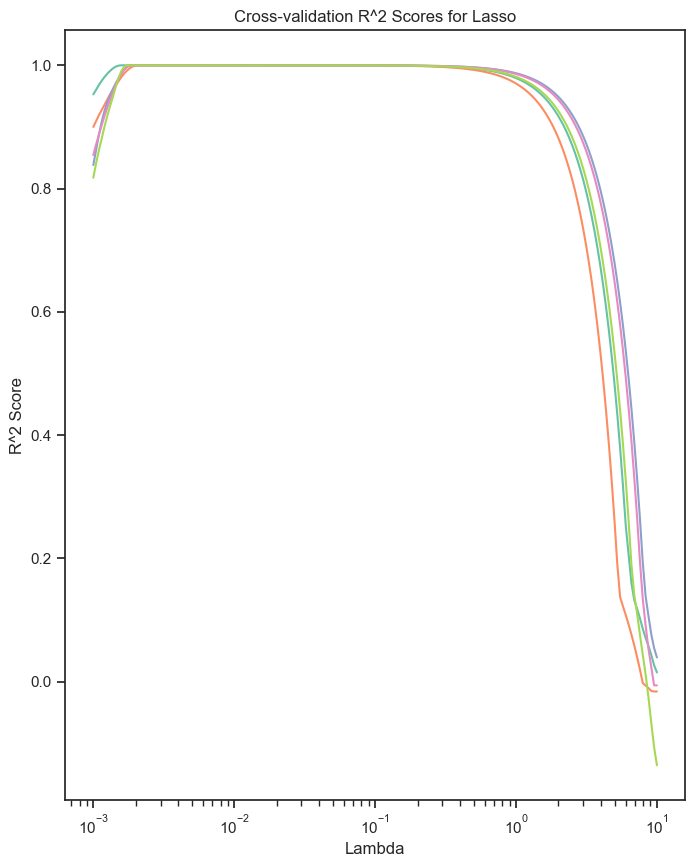

In [57]:
#Part 3. Use Lasso with a manually implemented Cross validation using the metric of your choice. 
#What is the value of the hyperparameter? 
#(Manually implemented means that you can either do it entirely on your own, or you can use GridSearchCV, but I’m asking you not to use LassoCV, which you will use in the next problem).

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

cv = 5
n_lambdas = 200
lambda_search = np.logspace(-3, 1, n_lambdas)

# Assuming X and y are your features and labels
n_samples = X.shape[0]
fold_size = n_samples // cv

# Cross-validation
for i in range(cv):
    r2_list = []
    
    # Define test fold
    start, end = i * fold_size, (i + 1) * fold_size
    X_test, y_test = X[start:end], y[start:end]
    
    #Define train fold 
    X_train = np.concatenate([X[:start], X[end:]], axis=0)
    y_train = np.concatenate([y[:start], y[end:]], axis=0)

    for lamb in lambda_search:
        lasso = Lasso(alpha=lamb)

        y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
        r2_score_lasso = r2_score(y_test, y_pred_lasso)
        r2_list.append(r2_score_lasso)
    
    plt.plot(lambda_search, r2_list)

plt.xlabel('Lambda')
plt.ylabel('R^2 Score')
plt.xscale('log')
plt.title('Cross-validation R^2 Scores for Lasso')
plt.show()

What above is doing: 
>Trying to find the lambda value(hyperparameter) that provides the best average performance across all folds(5), based chosen metric (R² score).
    

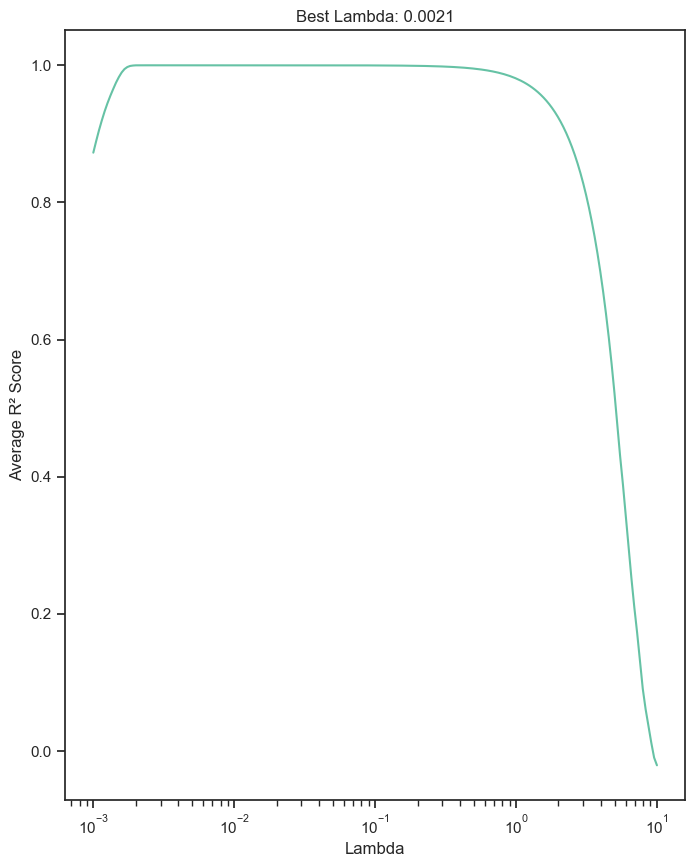

The best lambda is: 0.0021 with an average R² score of 1.0000


In [58]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

cv = 5
n_lambdas = 200
lambda_search = np.logspace(-3, 1, n_lambdas)

#init array
avg_r2_scores = np.zeros(n_lambdas)

n_samples = X.shape[0]
fold_size = n_samples // cv

# Cross-validation:
for i in range(cv):
    # Define test fold
    start, end = i * fold_size, (i + 1) * fold_size
    X_test, y_test = X[start:end], y[start:end]
    
    X_train = np.concatenate([X[:start], X[end:]], axis=0)
    y_train = np.concatenate([y[:start], y[end:]], axis=0)

    for idx, lamb in enumerate(lambda_search):
        lasso = Lasso(alpha=lamb)
        y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
        r2_score_lasso = r2_score(y_test, y_pred_lasso)
        
        # Accumulate scores
        avg_r2_scores[idx] += r2_score_lasso

# Calculate the average R2 score 
avg_r2_scores /= cv

# Find the lambda with  highest average R2 
best_lambda_idx = np.argmax(avg_r2_scores)
best_lambda = lambda_search[best_lambda_idx]

#plot result
plt.plot(lambda_search, avg_r2_scores)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Average R² Score')
plt.title(f'Best Lambda: {best_lambda:.4f}')
plt.show()

print(f"The best lambda is: {best_lambda:.4f} with an average R² score of {avg_r2_scores[best_lambda_idx]:.4f}")


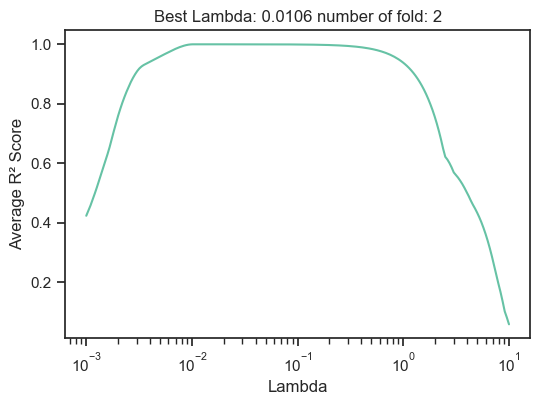

The best lambda is: 0.0106 with an average R² score of 1.0000


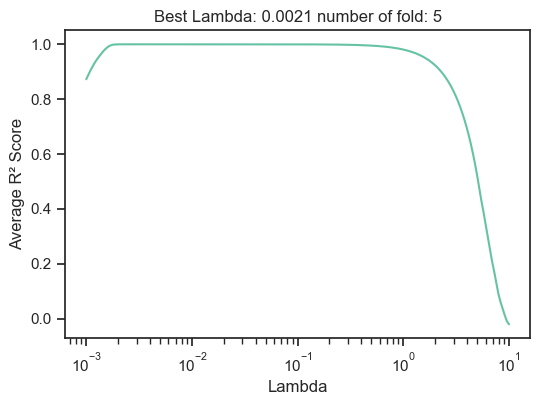

The best lambda is: 0.0021 with an average R² score of 1.0000


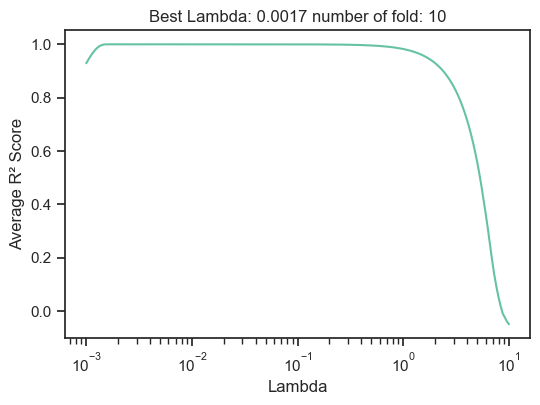

The best lambda is: 0.0017 with an average R² score of 1.0000


In [64]:
#Part 4. (Optional) Change the number of folds in your CV and repeat the previous step.
#How does the optimal value of the hyperparameter change? Try to explain any trends that you find.

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

for cv in [2,5,10]:


    n_lambdas = 200
    lambda_search = np.logspace(-3, 1, n_lambdas)

    # Init an array 
    avg_r2_scores = np.zeros(n_lambdas)

    n_samples = X.shape[0]
    fold_size = n_samples // cv

    # Cross-validation:
    for i in range(cv):
        start, end = i * fold_size, (i + 1) * fold_size
        X_test, y_test = X[start:end], y[start:end]

        # Define train fold 
        X_train = np.concatenate([X[:start], X[end:]], axis=0)
        y_train = np.concatenate([y[:start], y[end:]], axis=0)

        # R² score
        for idx, lamb in enumerate(lambda_search):
            lasso = Lasso(alpha=lamb)
            y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
            r2_score_lasso = r2_score(y_test, y_pred_lasso)

            # Accumulate R² scores for each lambda
            avg_r2_scores[idx] += r2_score_lasso

    #Calculate the average R² score 
    avg_r2_scores /= cv

    # Find the lambda with highest averagescore
    best_lambda_idx = np.argmax(avg_r2_scores)
    best_lambda = lambda_search[best_lambda_idx]

    plt.figure(figsize=(6,4))
    plt.plot(lambda_search, avg_r2_scores)
    plt.xscale('log')
    plt.xlabel('Lambda')
    plt.ylabel('Average R² Score')
    plt.title(f'Best Lambda: {best_lambda:.4f} number of fold: {cv}')
    plt.show()

    print(f"The best lambda is: {best_lambda:.4f} with an average R² score of {avg_r2_scores[best_lambda_idx]:.4f}")


What above is doing: 
>Trying to find the lambda value(hyperparameter) that provides the best average performance across all differenct folds(2,5,10), based chosen metric (R² score).
>As you can see as the fold number increases, the training set become increase, so overall performance(R2) is increasing. 
>But this could lead in sufficient validation test. So could be vurnerable to unseen data

In [115]:
#Part 5. (Optional) Read about and use LassoCV from sklearn.linear model.
#How does this compare with what you did in the previous step? 
#If they agree, then explain why they agree, and if they disagree explain why. 
#This will require you to make sure you understand what LassoCV is doing.
X_train, y_train = X[:75], y[:75]

# The best lambda by LASSO CV
best_lambda = model_lasso.alpha_
model_lasso = LassoCV(alphas = lambda_search,).fit(X_train, y_train)

print(f"The best lambda found by LassoCV is: {best_lambda:.4f}")

The best lambda found by LassoCV is: 0.0010


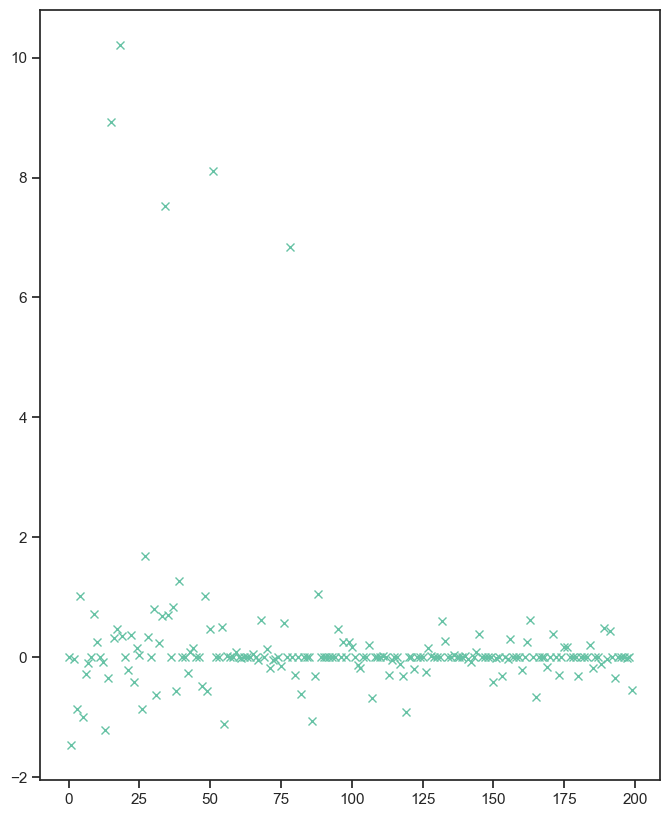

In [116]:

plt.plot(model_lasso.coef_,'x', label='Lasso coefficients')

Part 5

> The best lambda found by LassoCV is: 0.0010 which is similiar with manual result of cv=5 of 0.0021 and cv=10 of 0.0017

I think due to standarizaed data or not, and since LASSO CV is using multiple different CV values and there is a difference between manual CV and LASSO CV. Also, they may shuffle the data or standarizing by them selves! which could lead difference


## Problem 5 (Optional): Higher vs Lower K in K-Fold CV.

Using either Ridge regression (e.g., with the setting in the Ridge Regression colab notebook) or Lasso (e.g., the setting of the Lasso colab notebook, also linked to above), or with any other data sets you wish to construct, design and execute an experiment to investigate the claim when we do $k$-fold cross validation, as $k$ decreases, we have more bias but less variance.  Note that this is an open-ended exercise. It is asking you to use simulation and investigate what is going on with increasing or decreasing the number of folds in cross validation.


For k=2, Average MSE (Bias) = 38.8664, Average Variance = 27126.0217
For k=5, Average MSE (Bias) = 11.8971, Average Variance = 26859.5094
For k=10, Average MSE (Bias) = 8.0520, Average Variance = 25288.0838
For k=20, Average MSE (Bias) = 6.9548, Average Variance = 21703.9986
For k=50, Average MSE (Bias) = 6.5669, Average Variance = 16192.5900
For k=100, Average MSE (Bias) = 6.4225, Average Variance = 0.0000


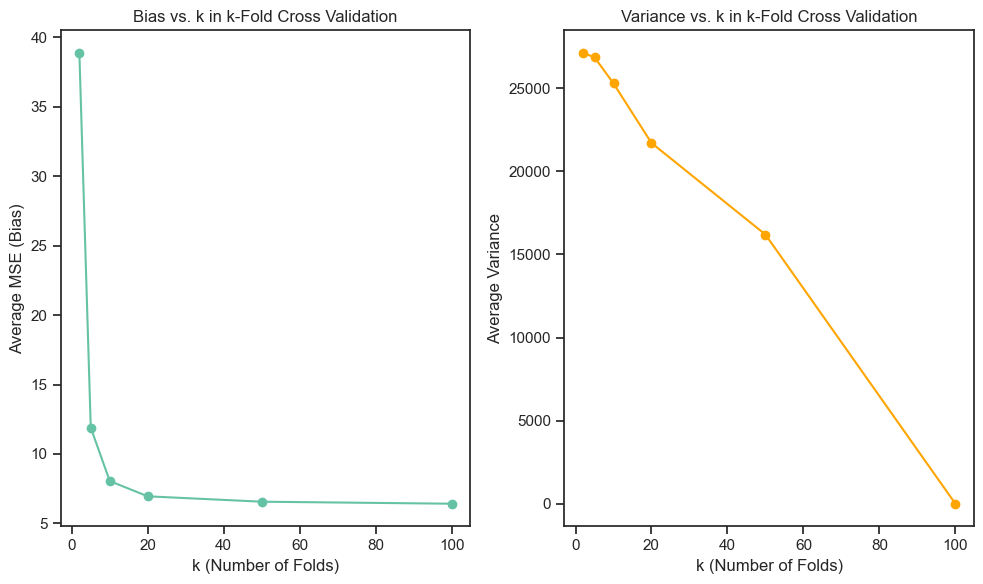

In [134]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import numpy as np

# Step 1:  dataset
X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)

# check k values
k_values = [2, 5, 10, 20, 50,  100]  # len(X) is the Leave-One-Out case

# Store results for comparison
results = []

# Step 2: diff k values
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_list = [] #for plot
    var_list = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Step3: Use Ridge or Lasso Regression (choose one)
        model = Ridge(alpha=1.0)  # You can use Lasso(alpha=1.0) similarly
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate MSE for bias for estimation
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)
    
        # Variance of prediction
        var_list.append(np.var(y_pred))

    # Step4: Calculate average MSE (bias) and variance across folds
    avg_mse = np.mean(mse_list)
    avg_variance = np.mean(var_list)

    results.append({'k': k, 'avg_mse': avg_mse, 'avg_variance': avg_variance})

    print(f"For k={k}, Average MSE (Bias) = {avg_mse:.4f}, Average Variance = {avg_variance:.4f}")

# Step5: Compare Bias and Var across k values

ks = [res['k'] for res in results]
avg_mses = [res['avg_mse'] for res in results]
avg_variances = [res['avg_variance'] for res in results]

plt.figure(figsize=(10, 6))

#plot Bias(MSE)
plt.subplot(1, 2, 1)
plt.plot(ks, avg_mses, marker='o')
plt.xlabel('k (Number of Folds)')
plt.ylabel('Average MSE (Bias)')
plt.title('Bias vs. k in k-Fold Cross Validation')

#plot Variance
plt.subplot(1, 2, 2)
plt.plot(ks, avg_variances, marker='o', color='orange')
plt.xlabel('k (Number of Folds)')
plt.ylabel('Average Variance')
plt.title('Variance vs. k in k-Fold Cross Validation')

plt.tight_layout()
plt.show()


In [128]:
X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)
print(X.shape,y.shape)

(100, 20) (100,)


## Problem 6 (Optional) Elastic Net

There may be settings where we want to combine ideas from Ridge and Lasso. There is a model that does this, by adding an L1 penalty (as in Lasso) and also an L2 penalty (as in Ridge). Read about this in sklearn and in [ISL](https://www.statlearning.com/) (or anywhere else). Try to construct an example where ElasticNetCV does better than LassoCV. Explain how you came up with this.


what elastice basically do is combining Ridge Regularization and Lasso Regularization, and by elastic net regularization inequality, the Beta hat and other Beta hat estimate difference is always smaller than some constant C. From that inequality below, 
> either Row(i,j) or lambda2 get bigger then, always |Beta hat(i)-Beta hat(j)| is getting smaller which is good!
> So that means, if we can find a example that have high correlation feature (which is row(i,j)) and have big lambda2 value, which indicates,high L2 regularization lambda, that would lead elastic net CV would be great!! High Lambda 2 value of Ridge Regularization is indicating, lots of features are useless, so we need a dataset that only few features are highly correlated(high row) and only few features are important(large lambda2)

So which means we need the dataset
>> 1. hight correlation 2. few features important

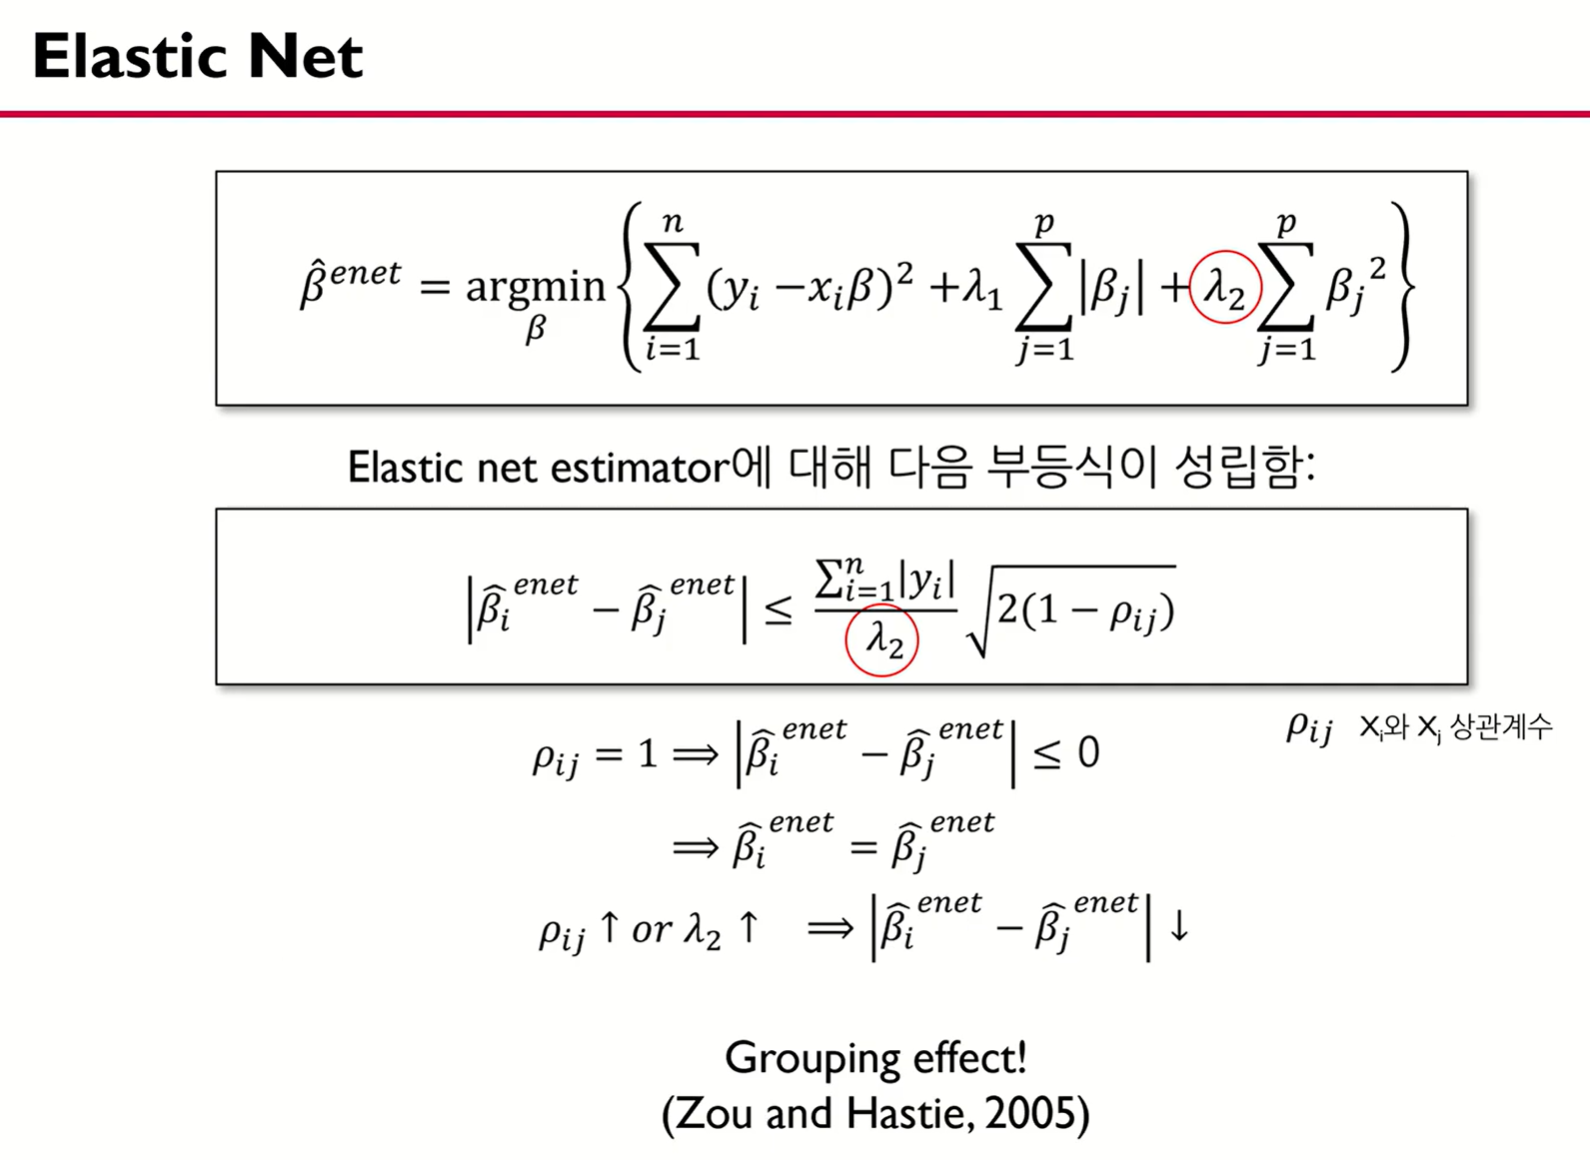
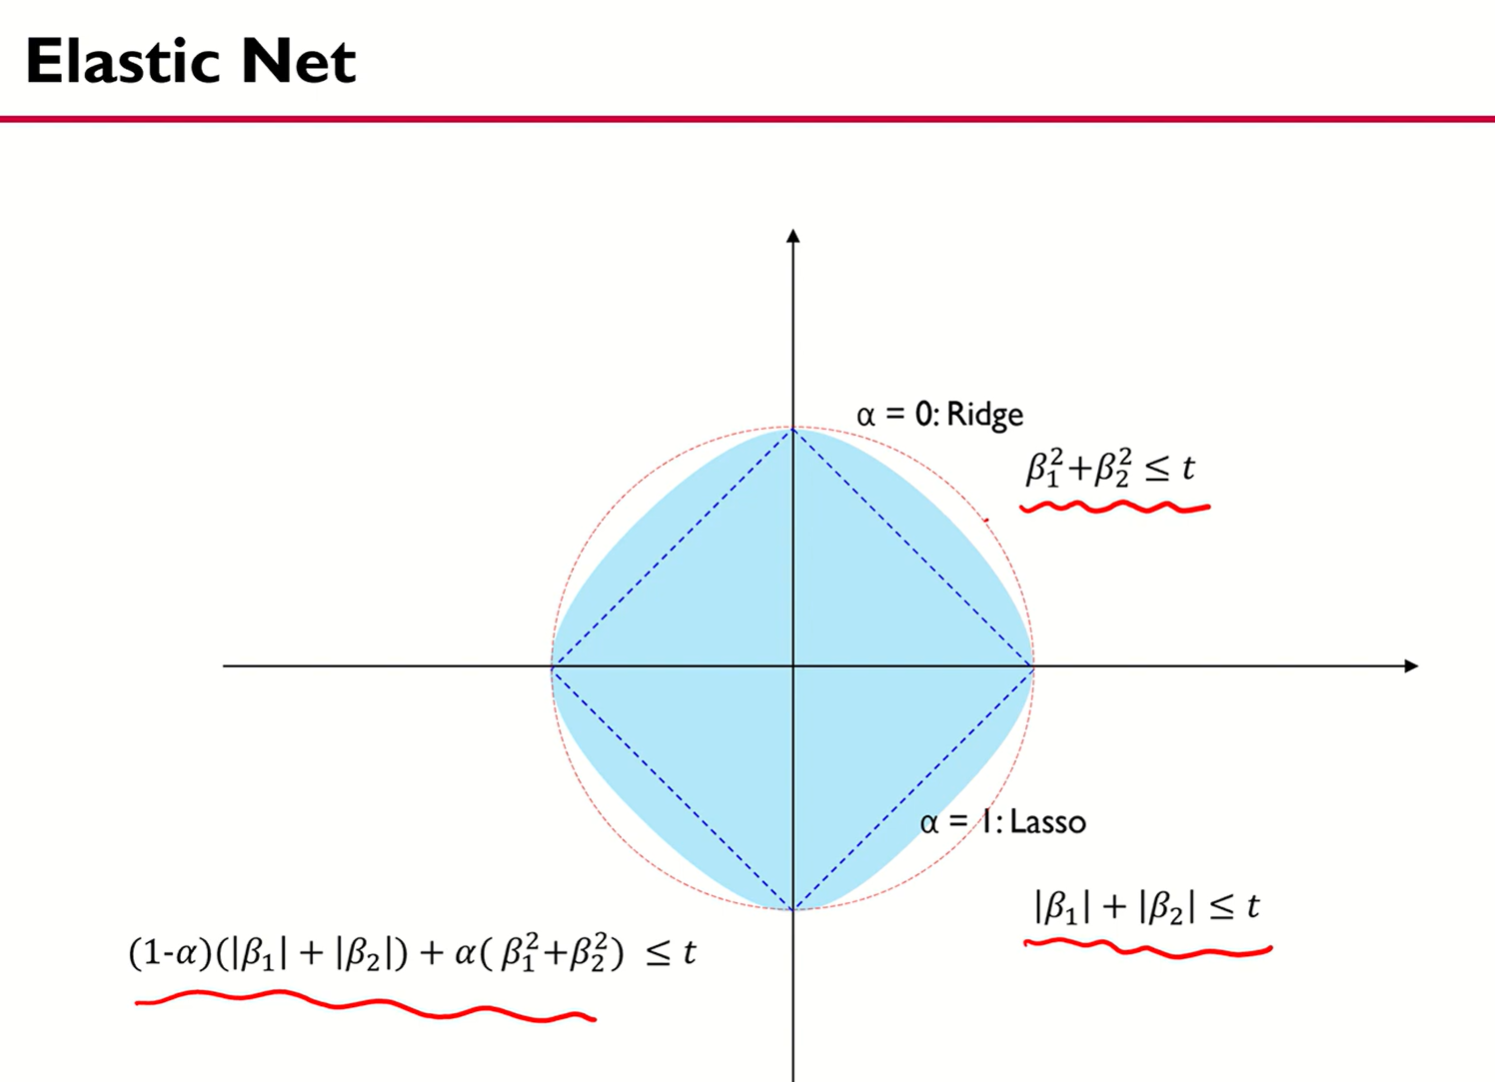
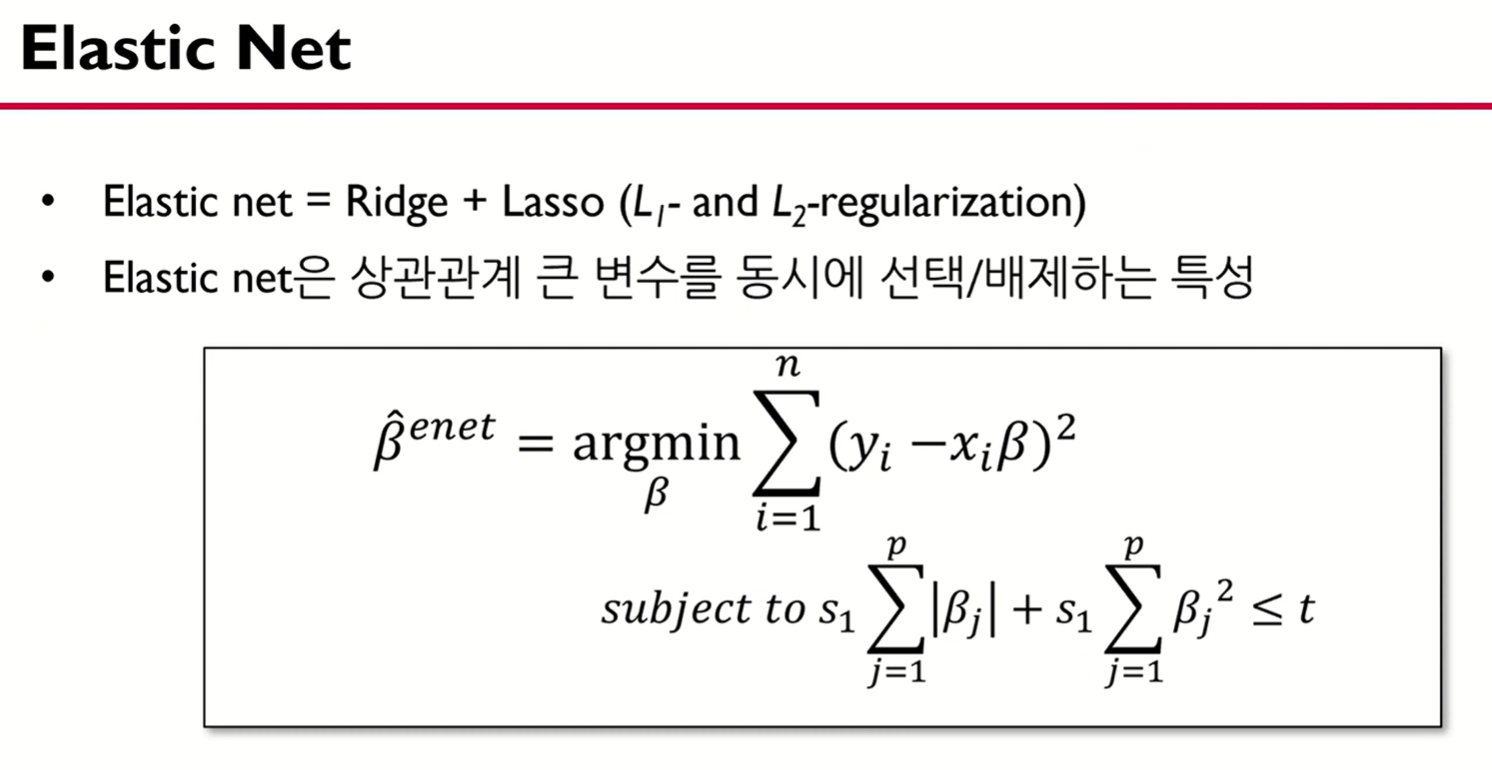

ElasticNet MSE: 311.9056
Lasso MSE: 0.4901


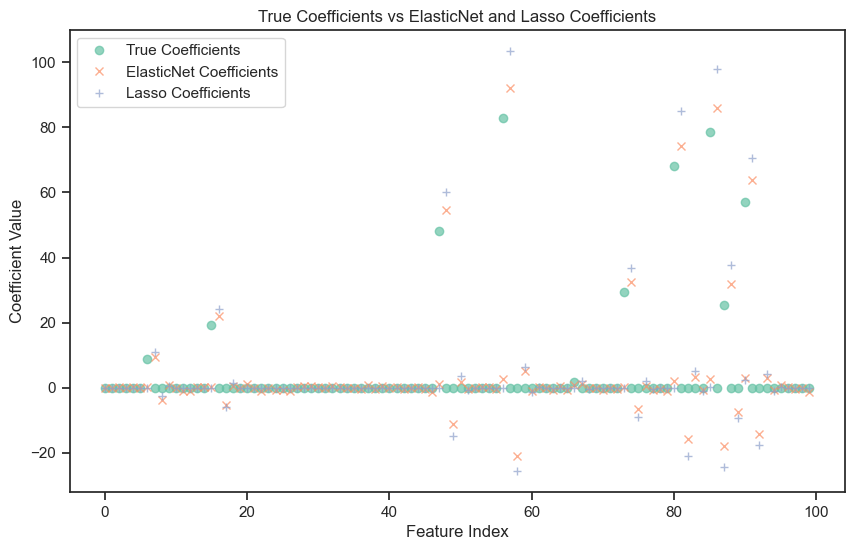

In [135]:

from sklearn.linear_model import ElasticNetCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression


# Set random seed
np.random.seed(42)

#Generate data with 1. highly correlated features and 2. only a few important ones
n_samples = 1000
n_features = 100
n_informative = 10  # Only 10 features are important(few features have to be important!!!!!)
X, y, coef = make_regression(n_samples=n_samples, n_features=n_features, 
                             n_informative=n_informative, noise=0.1, 
                             coef=True, random_state=42)

# Add correlations between features(high correlation needed!!!!)
corr_factor = 0.8
X[:, 1:] = X[:, :-1] * corr_factor + X[:, 1:] * (1 - corr_factor)

#Train ElasticNetCV and LassoCV on this dataset
elastic_net_model = ElasticNetCV(cv=5, l1_ratio=0.5, random_state=42).fit(X, y)
lasso_model = LassoCV(cv=5, random_state=42).fit(X, y)

# Calculate mean squared error
y_pred_elastic = elastic_net_model.predict(X)
y_pred_lasso = lasso_model.predict(X)

mse_elastic = mean_squared_error(y, y_pred_elastic)
mse_lasso = mean_squared_error(y, y_pred_lasso)

print(f"ElasticNet MSE: {mse_elastic:.4f}")
print(f"Lasso MSE: {mse_lasso:.4f}")

# Step 5: Plot coefficients for comparison
plt.figure(figsize=(10, 6))
plt.plot(coef, 'o', label="True Coefficients", alpha=0.7)
plt.plot(elastic_net_model.coef_, 'x', label="ElasticNet Coefficients", alpha=0.7)
plt.plot(lasso_model.coef_, '+', label="Lasso Coefficients", alpha=0.7)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.title('True Coefficients vs ElasticNet and Lasso Coefficients')
plt.show()

